# POSTOPERATIVE LIFE EXPECTANCY ANALYSIS

## Goal

This dataset from UCI archives (https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data) is intended to develop algorithms to predict life expectancy after surgery for patient with a lung cancer diagnosis. In this case study, We're going through data to understand how variables correlates with our target in order to select the most effective way to predict survival chances.

## General Assumptions

Incidence of lung cancer has increased recently and has become a big deal for oncology researchers and therapist. According to a retrospective cohort study published on PubMed (doi: 10.1186/1471-2466-8-22): We should consider some factor to be good prognosis for survival. Those factors concern age, gender, pulmonary function, size of tumor, hospital size and so many. Therefore we'll pay attention to those criteria when performing analysis

## Import Libraries and Loading Data

In [1]:
# Basic libraries for Data Science tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
dataset = pd.read_csv('ThoracicSurgery.csv')

In [3]:
# Show samples
dataset.head(10)

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
5,6,DGN3,2.48,1.88,PRZ1,F,F,F,T,F,OC11,F,F,F,F,F,51,F
6,7,DGN3,4.36,3.28,PRZ1,F,F,F,T,F,OC12,T,F,F,T,F,59,T
7,8,DGN2,3.19,2.50,PRZ1,F,F,F,T,F,OC11,F,F,T,T,F,66,T
8,9,DGN3,3.16,2.64,PRZ2,F,F,F,T,T,OC11,F,F,F,T,F,68,F
9,10,DGN3,2.32,2.16,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,54,F


In [4]:
dataset.shape

(470, 18)

In [5]:
dataset.columns

Index(['id', 'DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10',
       'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE',
       'Risk1Yr'],
      dtype='object')

In [6]:
dataset.dtypes

id           int64
DGN         object
PRE4       float64
PRE5       float64
PRE6        object
PRE7        object
PRE8        object
PRE9        object
PRE10       object
PRE11       object
PRE14       object
PRE17       object
PRE19       object
PRE25       object
PRE30       object
PRE32       object
AGE          int64
Risk1Yr     object
dtype: object

In [7]:
dataset.isnull().sum()

id         0
DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [9]:
# Show stats for numerical values
dataset.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


## Basic transformation

In [3]:
# rename columns to be more meaningful 
dataset = dataset.rename(columns={'DGN':'diagnosis','PRE4':'FVC','PRE5':'FEV1','PRE6':'PS','PRE7':'Pain','PRE8':'Haemoptysis', 'PRE9':'Dyspnea', 'PRE10':'Cough',
       'PRE11':'Weak', 'PRE14':'TNM', 'PRE17':'Diabetes', 'PRE19':'MI', 'PRE25':'PAD', 'PRE30':'Smoking', 'PRE32':'Asthma'})

NameError: name 'metadata' is not defined

In [11]:
# change datatype for binary class (boolean) | transform T in 1 and F in 0
# This step will help us for analysis
dataset = dataset.replace({'T': 1, 'F': 0})

In [12]:
# show transformed dataset
dataset

,id,diagnosis,FVC,FEV1,PS,Pain,Haemoptysis,Dyspnea,Cough,Weak,TNM,Diabetes,MI,PAD,Smoking,Asthma,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,2,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,3,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,4,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,5,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,0,0,0,1,0,OC13,0,0,0,1,0,63,0
466,467,DGN3,3.76,3.12,PRZ0,0,0,0,0,0,OC11,0,0,0,1,0,61,0
467,468,DGN3,3.04,2.08,PRZ1,0,0,0,1,0,OC13,0,0,0,0,0,52,0
468,469,DGN3,1.96,1.68,PRZ1,0,0,0,1,1,OC12,0,0,0,1,0,79,0


## Intuitive Data Exploration and Visualisation

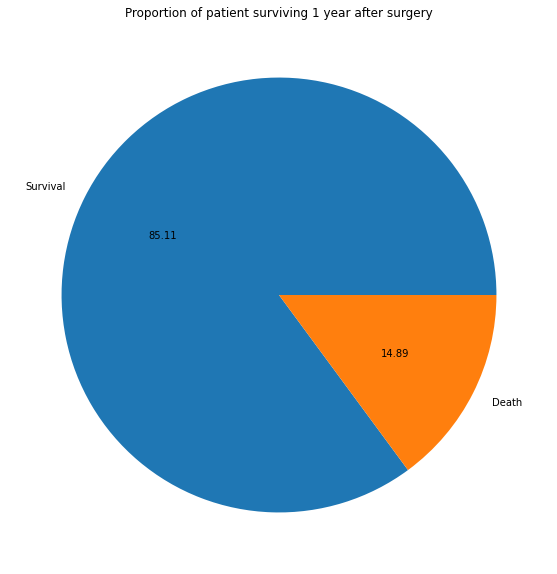

In [13]:
# Life expectancy in population | Survival 1 year after surgery
plt.figure(figsize = (20,10))
plt.title("Proportion of patient surviving 1 year after surgery")
plt.pie(dataset.Risk1Yr.value_counts(),labels = ['Survival','Death'],autopct='%.2f')
plt.show()

In [14]:
# Age distribution in population
dataset.AGE.describe()

count    470.000000
mean      62.534043
std        8.706902
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64

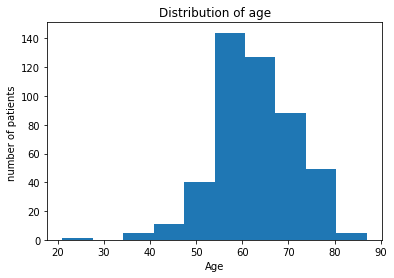

In [15]:
plt.ylabel('number of patients ')
plt.xlabel('Age')
plt.title('Distribution of age')
plt.hist(dataset.AGE)
plt.show()

We can see that age follow almost a normal distribution around a mean of 60 years. We also have some young subjects in the 20's. It can be interesting to discuss about the relevance of this case in such an analysis. We need to verify the statistical significance for age to see if some cases might not create biases for our prediction model.

In [16]:
# Let's take a look of other numerical variables
dataset.FVC.describe()

count    470.000000
mean       3.281638
std        0.871395
min        1.440000
25%        2.600000
50%        3.160000
75%        3.807500
max        6.300000
Name: FVC, dtype: float64

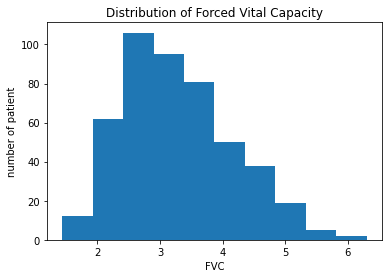

In [17]:
plt.ylabel('number of patient')
plt.xlabel('FVC')
plt.title('Distribution of Forced Vital Capacity')
plt.hist(dataset.FVC)
plt.show()

We can see that FVC distribution is near to a normal distribution around a mean of 3.28 and decrease slowly for volume higher than the mean. An average value for healthy man would be in 4.75-5.5 and between 3.25-3.75 for women according to https://www.nuvoair.com/blog/do-you-know-how-to-interpret-the-results-of-your-spirometry-test#:~:text=Average%20normal%20values%20in%20healthy,from%203.75%20to%203.25%20liters.

<AxesSubplot:xlabel='FVC', ylabel='AGE'>

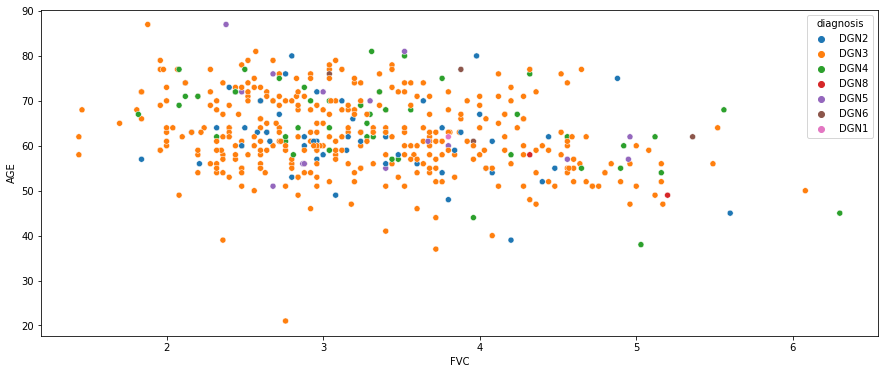

In [18]:
plt.figure(figsize=(15,6))
sns.scatterplot(dataset.FVC,dataset.AGE,hue=dataset['diagnosis'])

Scatter plot are really usefull for viewing correlation between multiple variables. In our case, the dataset consist of several binary variables which lead to less meaningfull scatter plot. We can use this plot and select different variables that we want to show.

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

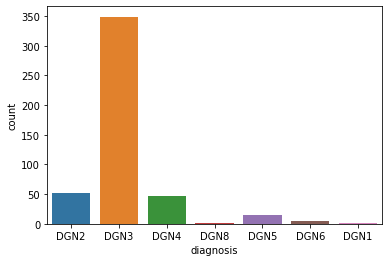

In [19]:
# Now let's look at categorical variables
# Different diagnosis 
sns.countplot(data = dataset, x = 'diagnosis')

<AxesSubplot:title={'center':'Survival population'}, xlabel='diagnosis', ylabel='count'>

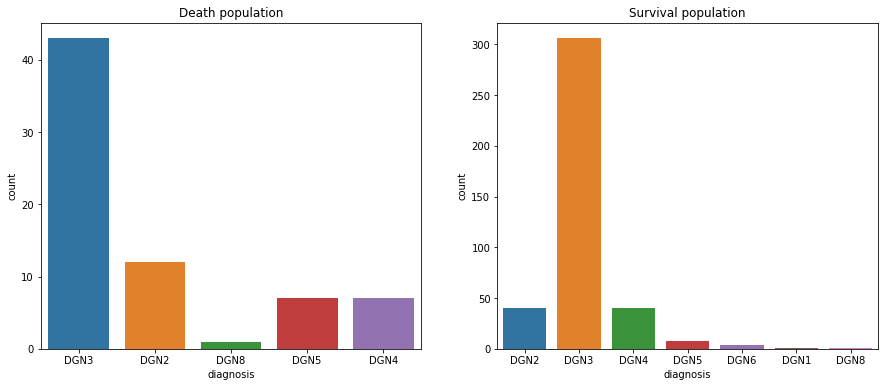

In [20]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1,title= 'Death population')
sns.countplot(data = dataset[dataset['Risk1Yr'] == 1], x = 'diagnosis')
plt.subplot(1,2,2,title= 'Survival population')
sns.countplot(data = dataset[dataset['Risk1Yr'] == 0], x = 'diagnosis')

<AxesSubplot:xlabel='TNM', ylabel='count'>

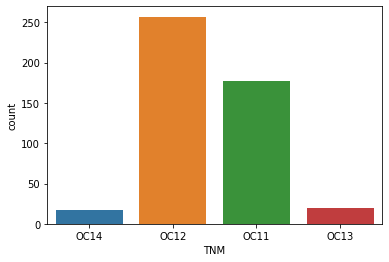

In [21]:
# Tumor size
sns.countplot(data = dataset, x = 'TNM')

We can see that the majority of patients are diagnosed with a tumor of type 1 or 2 which are the smallest in the TNM classification. We can look at the differences of life expectancy between differents tumor sizes as we did with diagnosis:

<AxesSubplot:title={'center':'Survival population'}, xlabel='TNM', ylabel='count'>

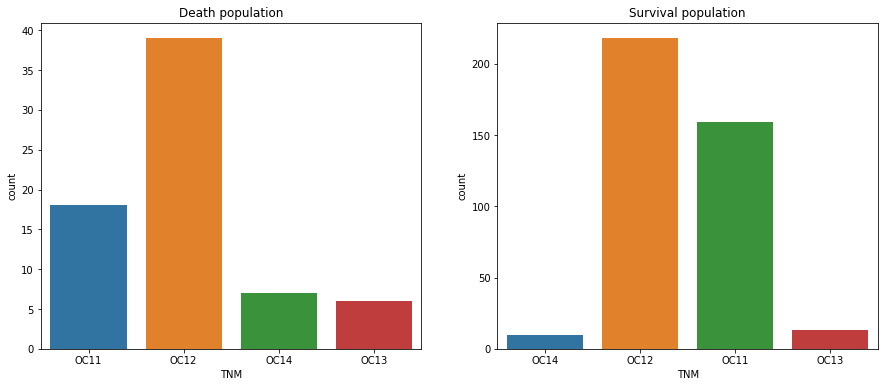

In [22]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1,title= 'Death population')
sns.countplot(data = dataset[dataset['Risk1Yr'] == 1], x = 'TNM')
plt.subplot(1,2,2,title= 'Survival population')
sns.countplot(data = dataset[dataset['Risk1Yr'] == 0], x = 'TNM')

<BarContainer object of 10 artists>

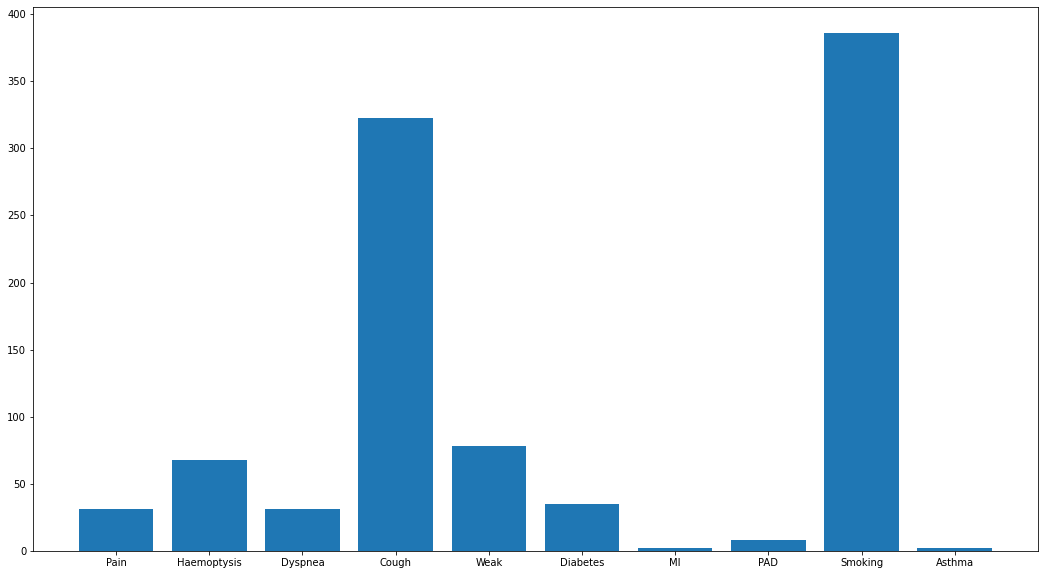

In [23]:
# Now let's go through binary variable and see which factors is more present
risk_factors = dataset[dataset['Risk1Yr'] == 0].drop(['id','FVC','FEV1','AGE'],axis = 1).select_dtypes(exclude= "O")
values = []
for i in risk_factors.drop('Risk1Yr',axis=1).columns:
    values.append(dataset[i][dataset[i]==1].count())
plt.figure(figsize=(18,10))
plt.bar( risk_factors.drop('Risk1Yr',axis=1).columns,values)

This plot show us that cough and smoking are frequently present in patients that won't survive 1 year after surgery. But, it is not sufficent to tell that there is strong relation. Indeed, those factors might be highly present in the general population as well.

<AxesSubplot:title={'center':'cough'}, xlabel='Cough', ylabel='count'>

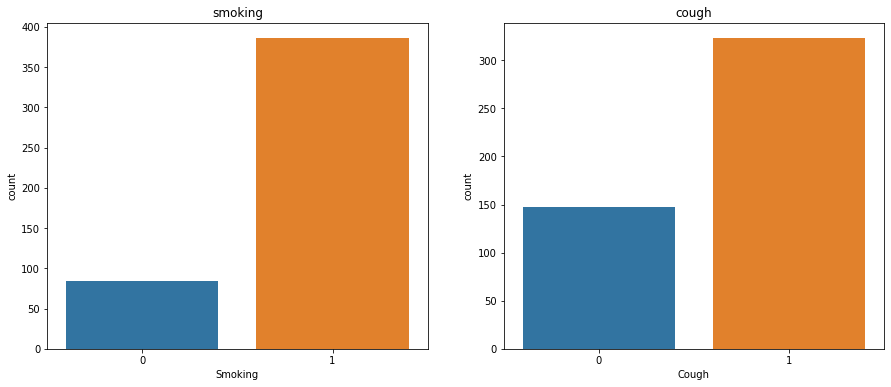

In [24]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1,title= 'smoking')
sns.countplot(dataset.Smoking)
plt.subplot(1,2,2,title= 'cough')
sns.countplot(dataset.Cough)

As we assume on the previous step: Cough and smoking are highly present in patients. Therefore we cannot make any conclusion for the moment on the most relevant factors for predicting survival. We need to go through some statistic analysis to have significant results.

## Statistical analysis

In [25]:
# Let's see correlation between variables with their statistical significance

In [26]:
# We want to retrieve significant variables for analysis | p-value < 5%
# we create an boolean array for resuming signicant variables
significance = []
# We can change the alpha for pearson's R
alpha = 0.05
# for each variables we calculate the pearson's correlation coefficient with our target (Risk1Yr) and test the p-value
for i in dataset.drop(['id','Risk1Yr'],axis = 1).select_dtypes(exclude= "O"):
    print(i,": corr coef =",stats.pearsonr(dataset[i],dataset.Risk1Yr)[0]," p-value =",stats.pearsonr(dataset[i],dataset.Risk1Yr)[1])
    if stats.pearsonr(dataset[i],dataset.Risk1Yr)[1] < alpha:
        significance.append(i)
print("\n The most statisticly relevant variable are", significance)
# We add Risk1Yr to significance array in order to use it later for adaptative model prediction
significance.append("Risk1Yr")

FVC : corr coef = -0.04637386024260584  p-value = 0.3157527845926087
FEV1 : corr coef = -0.04284051796257496  p-value = 0.35407573914337265
Pain : corr coef = 0.05737542294319238  p-value = 0.21439146294260109
Haemoptysis : corr coef = 0.0657846986237473  p-value = 0.1544686532442641
Dyspnea : corr coef = 0.10552979577051462  p-value = 0.022129849323555408
Cough : corr coef = 0.08885995029896161  p-value = 0.054214632114719746
Weak : corr coef = 0.08646715517624609  p-value = 0.06105720803779694
Diabetes : corr coef = 0.10897449165334445  p-value = 0.01811487699545486
MI : corr coef = -0.027347088471412265  p-value = 0.5542506659249873
PAD : corr coef = 0.037354127745358595  p-value = 0.4191229459830353
Smoking : corr coef = 0.08595822779544741  p-value = 0.06260093692850141
Asthma : corr coef = -0.027347088471412272  p-value = 0.5542506659249873
AGE : corr coef = 0.03890154601687386  p-value = 0.4001024825207672

 The most statisticly relevant variable are ['Dyspnea', 'Diabetes']


## Data preprocessing | Feature Engineering

For simple classification task, we can use Logistic regression. Therefore we need to prepare the dataset for the algorithm.
At the beginning we've done some basic transformation, the remaining transformation is to change categorical variable in order to be processed well. For this, we'll use One hot encoding which is the most appropriate for logistic regression without adding a biase with default values.

In [27]:
from sklearn.model_selection import train_test_split
# Don't need Id column
dataset = dataset.drop('id',axis=1)
# one hot encoding for categorical variable
dataset = pd.get_dummies(dataset, columns = dataset.select_dtypes(include="O").columns)
# split dataset
train, test = train_test_split(dataset, test_size=0.25)

In [28]:
# split features and labels
y_train = train.Risk1Yr
X_train = train.drop('Risk1Yr',axis=1)
y_test = test.Risk1Yr
X_test = test.drop('Risk1Yr',axis=1)

In [29]:
#import model
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [30]:
# train model
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Show score
print('NAIVE MODEL SCORE')
print('Train set accuracy:',round(model.score(X_train,y_train),4))
print('Test set accuracy:',round(model.score(X_test,y_test),4))

NAIVE MODEL SCORE
Train set accuracy: 0.8665
Test set accuracy: 0.7966


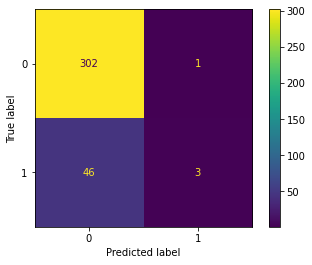

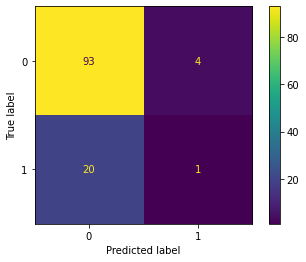

In [32]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_train, y_train)
plot_confusion_matrix(model, X_test, y_test)

On this confusion matrix, we can see that the model did a great job to identify survival cases but fail with death cases. The purpose of those models is to identify probability of death so those result are not perfect yet considering the usage that it can provide. 

### New model with selected variables from statistical analysis

In [33]:
selected_variable = dataset[significance]
train_selec, test_selec = train_test_split(selected_variable, test_size=0.25)

In [34]:
# split features and labels
y_train_selec = train_selec.Risk1Yr
X_train_selec = train_selec.drop('Risk1Yr',axis=1)
y_test_selec = test_selec.Risk1Yr
X_test_selec = test_selec.drop('Risk1Yr',axis=1)

In [35]:
# train logistic regression model
model_selec = LogisticRegression()
model_selec.fit(X_train_selec, y_train_selec)

LogisticRegression()

In [36]:
# Show score 
print('SELECTIVE VARIABLE MODEL SCORE')
print('Train set accuracy:',round(model_selec.score(X_train_selec,y_train_selec),4))
print('Test set accuracy:',round(model_selec.score(X_test_selec,y_test_selec),4))

SELECTIVE VARIABLE MODEL SCORE
Train set accuracy: 0.8523
Test set accuracy: 0.8475


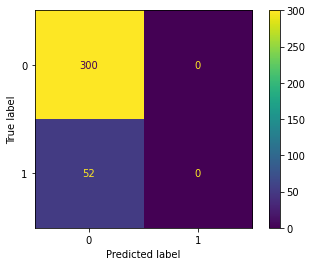

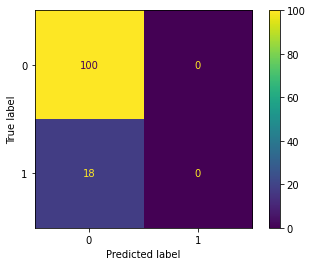

In [37]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_selec, X_train_selec, y_train_selec)
plot_confusion_matrix(model_selec, X_test_selec, y_test_selec)

## Improvements | To go further

This analysis helped us to understand the distribution of variables and importance in some factors regarding survival chances. After a small statistical analysis, that we can push further, we were able to construct a regression model and express Risk after one year in terms of variables in the dataset. Models that we obtain have a pretty good accuracy but fail in Death detection. In my opinion, this is due to a high probability of survival in samples, with an even number of survival/death ratio, I expect a better detection of death case. 

The amount of binary variable might also decrease our precision in prediction, especially for the target variable 'Risk at 1 Year' that is true or false. If we had numerical value for a duration of lifetime expectancy, we might have better precision. 
For better performances, we should consider other models as Decision Trees or SVM. 
Finally, the dataset is constituted with less than 500 samples which are nice for a first try but not sufficent for developping a reliable model.